In [7]:
# Cài đặt nếu chưa có: !pip install yfinance pandas matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Tải dữ liệu FPT từ Yahoo Finance

In [8]:
ticker = "FPT.VN" # Hoặc "AAPL" cho Apple
df = yf.download(ticker, start="2020-01-01", end="2023-12-31")

/tmp/ipython-input-2394985476.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


# 2. Kiểm tra dữ liệu (Data Inspection)

In [9]:
print(df.head())
# Xem có dòng nào bị Null không (Data Cleaning)
print(df.isnull().sum())

Price              Close          High           Low          Open   Volume
Ticker            FPT.VN        FPT.VN        FPT.VN        FPT.VN   FPT.VN
Date                                                                       
2020-01-02  23034.029297  23191.259102  22798.186443  22916.108796  2164345
2020-01-03  22640.957031  23230.566957  22562.343980  23151.952053  4942819
2020-01-06  22405.113281  22640.956130  22326.498381  22444.420732  2634859
2020-01-07  22837.494141  22837.494141  22405.114025  22523.036380  2020780
2020-01-08  22326.498047  22680.263242  22326.498047  22601.650195  4437500
Price   Ticker
Close   FPT.VN    0
High    FPT.VN    0
Low     FPT.VN    0
Open    FPT.VN    0
Volume  FPT.VN    0
dtype: int64


# 3. Tính toán chỉ báo (Feature Engineering)

In [10]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# 4. Tạo tín hiệu (Signal Generation)

In [11]:
# Nếu MA20 > MA50 thì Signal = 1 (Giữ cổ phiếu), ngược lại = 0 (Cầm tiền mặt)
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'], 'Signal'] = 1
# Quan trọng: Dời tín hiệu về ngày hôm trước để tránh "nhìn thấy tương lai" (Look-ahead bias)
df['Position'] = df['Signal'].shift(1)

# 5. Tính lợi nhuận hàng ngày (Daily Returns)

In [12]:
# pct_change() tính % thay đổi giá so với ngày hôm qua
df['Market_Return'] = df['Close'].pct_change()

# 6. Tính lợi nhuận chiến thuật (Strategy Return)

In [13]:
# Lợi nhuận = Lợi nhuận thị trường * Vị thế (1 là có hàng, 0 là không)
df['Strategy_Return'] = df['Market_Return'] * df['Position']

# 7. Tính tổng lợi nhuận tích lũy (Cumulative Return)

In [14]:
# Dùng hàm cumprod() để tính lãi kép
df['Cumulative_Market_Return'] = (1 + df['Market_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

# 8. Vẽ biểu đồ so sánh (Visualization)

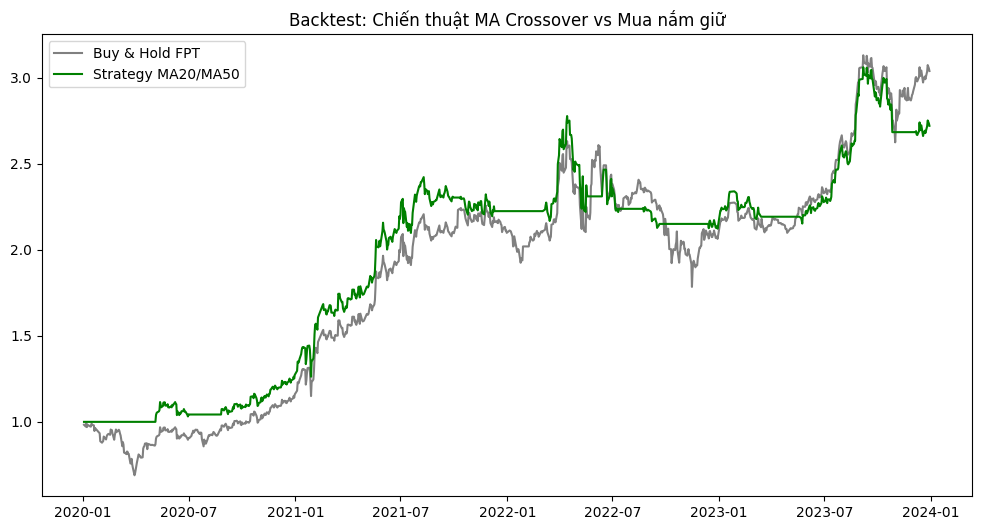

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative_Market_Return'], label='Buy & Hold FPT', color='gray')
plt.plot(df['Cumulative_Strategy_Return'], label='Strategy MA20/MA50', color='green')
plt.title('Backtest: Chiến thuật MA Crossover vs Mua nắm giữ')
plt.legend()
plt.show()